# Building dummy dataframe

Due to technical problems, the measurements have not been run yet. 

To avoid further waste of precious thesis time, I decided to build this dummy dataset from previous raw sensor outputs. 

This is far from ideal, but at least the values extracted here are expected to be in the same order of magnitude of the real data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Raw sensor output from previous experiments
data = pd.read_excel('../data/NO2_NO_NH3_freq_meas_data_2021-02-16.xlsx', sheet_name =  1)

In [3]:
# Quick look
data.head()

,NO2,NO,NH3,1,2,3,4,5,6,7,...,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294
0,50,100,25,0.000263,0.000263,0.000263,0.000263,0.000262,0.000262,0.000262,...,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245
1,100,25,100,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,...,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260
2,25,100,50,0.000259,0.000259,0.000259,0.000259,0.000259,0.000258,0.000258,...,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000247
3,50,25,100,0.000246,0.000246,0.000247,0.000247,0.000247,0.000247,0.000247,...,0.000262,0.000262,0.000262,0.000262,0.000261,0.000261,0.000261,0.000261,0.000260,0.000260
4,100,100,25,0.000257,0.000257,0.000257,0.000257,0.000256,0.000256,0.000256,...,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243


In [4]:
# Creating dummy data
n_time = 1200 # Number of time steps
n_splits = 25 # Number of splits of the data
N = 27 # Number of gas mixtures

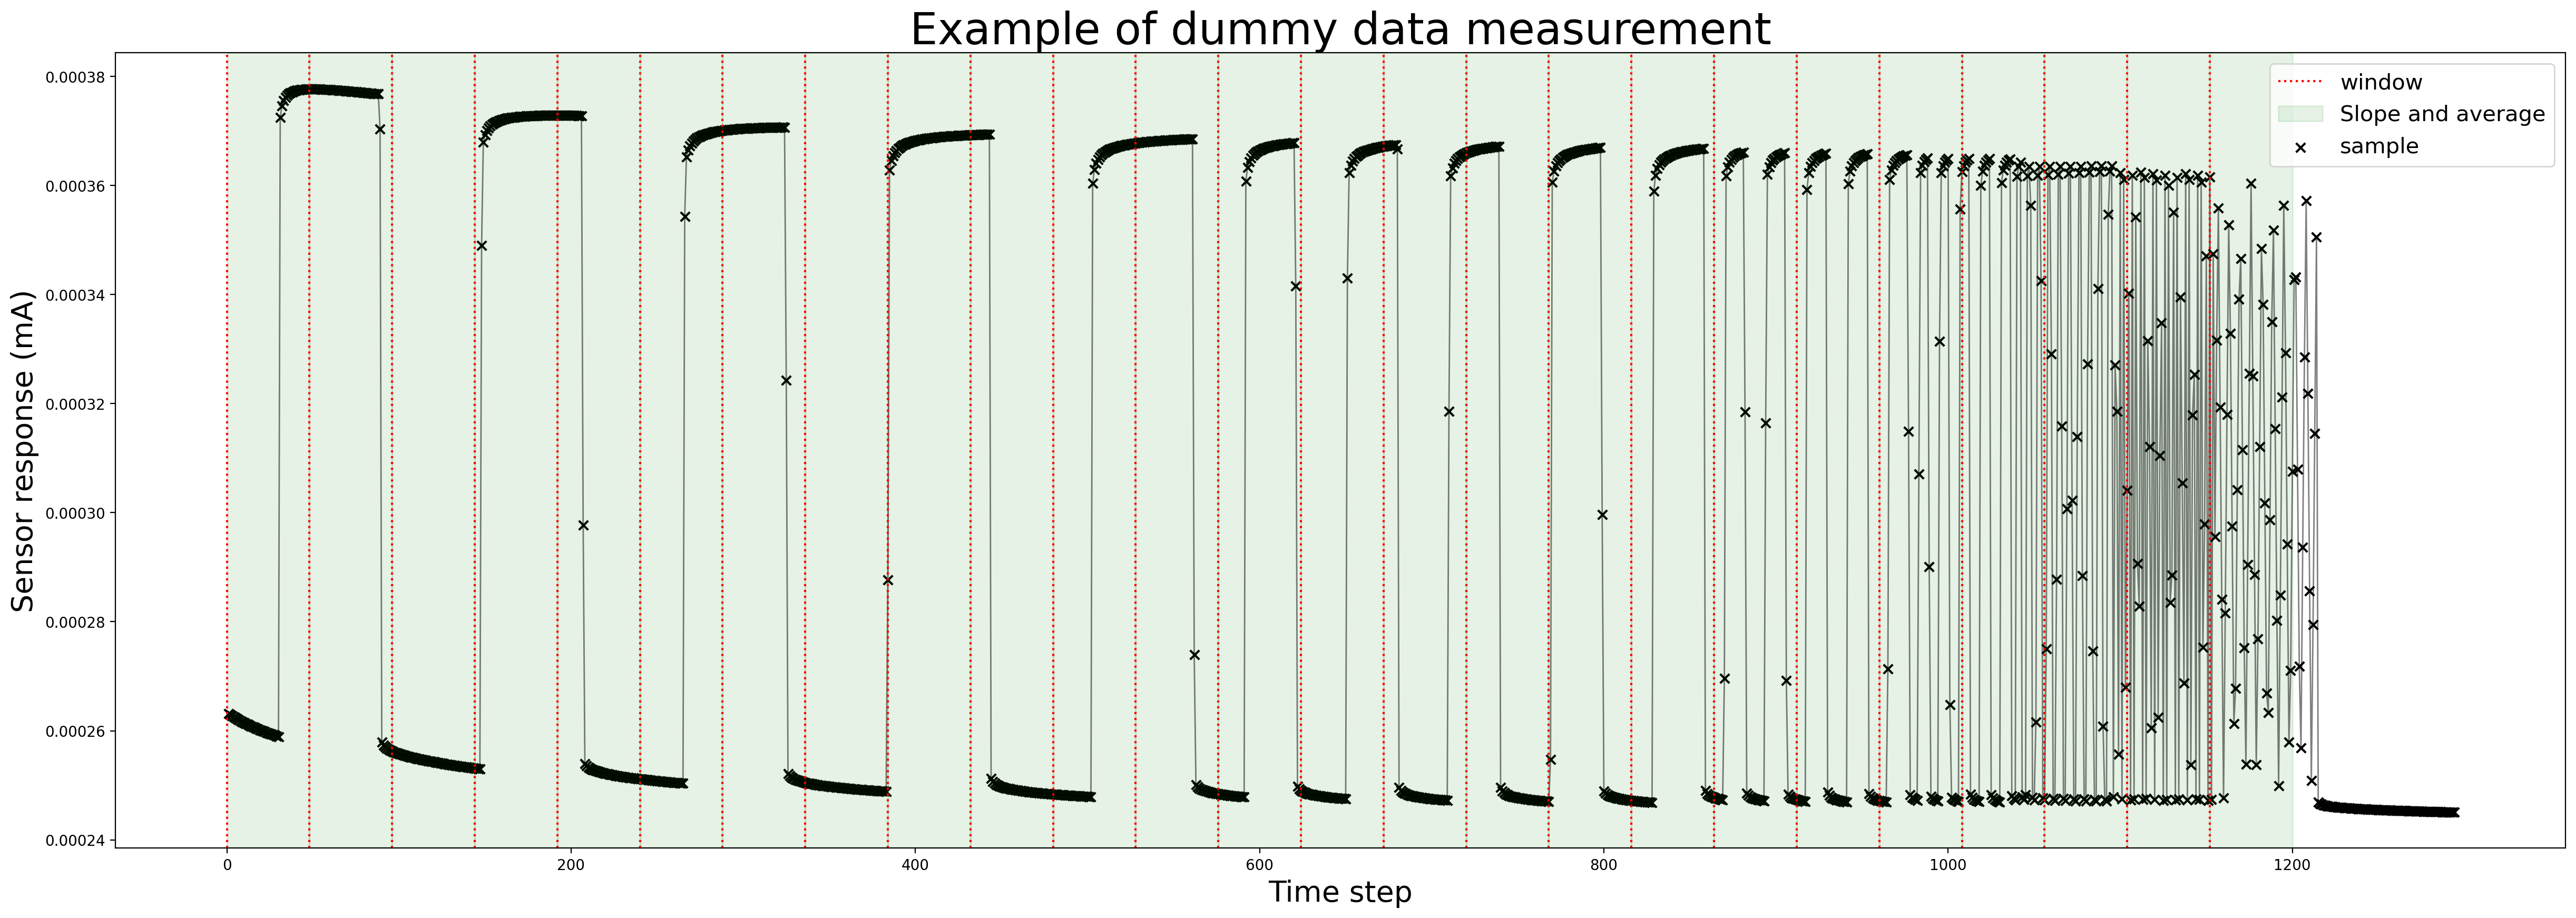

In [5]:
feats = [(n_time/n_splits)*i for i in range(n_splits + 1)]
x = data.columns[3:]
y = data.iloc[0][3:]
plt.figure(num=None, figsize=(30, 10), dpi=200, facecolor='w', edgecolor='k')
plt.plot(x, y, color = 'black', lw = 1, alpha = 0.5)
plt.scatter(x, y, color = 'black', marker = 'x', s = 40, label = 'sample')
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Sensor response (mA)', fontsize = 20)
plt.title(r'Example of dummy data measurement', fontsize=30)
plt.axvline(x=feats[0], color = 'red', linestyle = ':', label = 'window')
plt.axvspan(feats[0], feats[0]+(n_time/n_splits), color='green', alpha = 0.1, label = 'Slope and average')
for f in feats[1:-1]:
    plt.axvline(x=f, color = 'red', linestyle = ':')
    plt.axvspan(f, f + (n_time/n_splits), color='green', alpha = 0.1)

plt.legend(prop={'size': 15}, loc = 'best')
plt.savefig('../figures/dummy-data.png')
plt.show()

In [6]:
# Gas concentrations
Y = np.asarray(data[['NO2', 'NO', 'NH3']])

In [7]:
# Raw response
response = np.asarray(data.loc[:, list(range(1,n_time+1))])
response = (response - response.mean())/(response.std())

In [8]:
# Time steps
time = np.asarray(data.columns[3:n_time+3])
# Split
time_splits = np.array_split(time, n_splits)

In [9]:
response_splits = np.array_split(response, n_splits, axis = 1)

In [10]:
t_len = time_splits[0].shape[0]

In [11]:
t = list(range(t_len))

In [12]:
# Average and Slope per split
avg = np.zeros((N, n_splits))

for i, resp in zip(range(N),response_splits):
    # Computing average per split
    avg[:,i] = np.average(resp, axis =1)
    
slope = np.zeros((N, n_splits))

for split, j in zip(response_splits, range(n_splits)):
    slp = []
    for row in split:
        slp.append(linregress(row, t)[0])
    slope[:, j] = slp

In [13]:
print(slope.shape)

(27, 25)


In [14]:
# Shape Features
X = np.concatenate((avg, slope), axis = 1)

In [15]:
# Renaming columns and rows to keep it organized
# gas_name = ['NO2', 'NO', 'NH3']
# slope_name = [f'slope{i}' for i in range(n_splits)]
# avg_name = [f'avg{i}' for i in range(n_splits)]
# column_name = gas_name + slope_name + avg_name
# row_name = [f'mix{i}' for i in range(N)]

In [16]:
# Building df
dummy = pd.concat([pd.DataFrame(Y), pd.DataFrame(X)], axis=1)
#dummy.columns = list(range((n_splits*2)+3))
#dummy.rename(columns = {i:column_name[i] for i in range((n_splits*2)+3)}, index = {i:row_name[i] for i in range(N)}, inplace = True)

In [17]:
dummy

,0,1,2,0,1,2,3,4,5,6,...,40,41,42,43,44,45,46,47,48,49
0,50,100,25,-0.076323,0.915652,-0.970946,0.999202,-0.363800,-0.026400,0.603117,...,-11.274687,-10.370948,3.966974,-0.479340,-0.897105,-1.193424,-0.859378,-0.295100,0.139488,-1.384177
1,100,25,100,-0.352834,0.854548,-0.934629,0.984386,-0.188594,0.027784,0.792582,...,-11.287665,-11.421536,1.860088,-2.393667,-3.398451,-1.537137,1.852853,0.843001,-0.142613,-0.226984
2,25,100,50,-0.141720,0.874015,-0.959047,0.999862,-0.352600,0.027594,0.561209,...,-4.754586,-11.580877,-3.583086,-3.218467,-1.802992,-3.633486,-1.606139,0.181117,0.378844,0.102442
3,50,25,100,-0.249815,0.890990,-0.850049,1.123559,-0.242452,0.254415,0.645449,...,1.367344,-11.669267,-6.962770,2.391163,3.753269,2.388314,0.911241,-0.732785,0.338205,-4.613772
4,100,100,25,-0.188844,0.765447,-1.026246,0.960545,-0.511767,0.027451,0.372231,...,1.599057,-10.410155,-6.444129,3.060615,4.349158,2.218008,0.221968,-0.814733,-1.289578,-8.247182
5,50,50,50,-0.415064,0.609347,-1.150989,0.845831,-0.613715,-0.031784,0.262329,...,5.359048,-6.880136,-4.223717,4.519892,2.970174,-1.637835,-1.729597,-0.085465,0.759171,-8.842345
6,100,25,50,-0.431664,0.551698,-1.197907,0.814790,-0.707034,-0.045636,0.159301,...,7.805685,-4.566018,-5.268447,3.146000,1.534817,-2.082063,-2.645269,-1.868441,-1.213840,-12.030718
7,25,100,25,-0.445518,0.565070,-1.172126,0.818395,-0.628472,-0.046904,0.250265,...,4.836186,-7.897586,-4.816016,4.723556,3.817803,-0.655788,-0.450205,0.615324,0.772198,-8.427461
8,25,25,50,-0.401960,0.589888,-1.156102,0.829535,-0.622649,-0.043613,0.245867,...,5.384483,-6.940902,-4.274462,4.549973,3.144717,-1.513434,-1.619378,0.045822,0.891868,-8.548183
9,100,50,100,-0.386150,0.716026,-0.971836,1.011818,-0.408980,0.170239,0.455911,...,5.985839,-6.709699,-4.771018,4.608592,2.659840,-1.935746,-2.575411,-0.089118,-0.114355,-11.899027


In [18]:
# Saving to file
dummy.to_csv('../data/dummy.csv', index = False)